In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/State farm/Big_dataset.zip"

In [ ]:
!pip install -U keras
!pip install httplib2==0.17.0
!pip install -U -q PyDrive

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)
     |████████████████████████████████| 102kB 3.1MB/s 
  Found existing installation: httplib2 0.17.4
    Uninstalling httplib2-0.17.4:
      Successfully uninstalled httplib2-0.17.4


In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,layers,models
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [ ]:
img_width, img_height = 224, 224
train_data_dir = "/content/Big_dataset/train"
validation_data_dir = "/content/Big_dataset/validation"
test_data_dir = '/content/Big_dataset/test'
batch_size = 100

#Initializing weights with Imagenet weights
vgg_conv = applications.MobileNet(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

#freezing the layers except last 6 layers
for layer in vgg_conv.layers[:-13]:
    layer.trainable = False
    
for layer in vgg_conv.layers:
    print(layer.name,layer.trainable)
    
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
input_1 False
conv1_pad False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 False
conv_dw_6 False
conv_dw_6_bn False
conv_dw_6_relu False
conv_pw_6 False
conv_pw_6_bn False
conv_pw_6_relu False
conv_dw_7 False
conv_dw_7_bn False
conv_dw_7_relu False
conv_pw_7 False
conv_pw_7_bn False
conv_pw_7_relu False
conv_dw_8 False
conv_dw_8_

In [ ]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_batch_size = 128
valid_batch_size = 32

train_generator = train_datagen.flow_from_directory(directory=train_data_dir,
                  target_size = (img_height, img_width),
                  batch_size = train_batch_size, 
                  class_mode = "categorical",
                  shuffle=True)

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                       target_size = (img_height, img_width),
                       batch_size = valid_batch_size,
                       class_mode = "categorical",
                       shuffle=True)

opt = Adam(lr=0.0001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

Found 16000 images belonging to 10 classes.
Found 3911 images belonging to 10 classes.


# **ADAM**

In [ ]:
#checkpoint will save the best weights
checkpoint = ModelCheckpoint("model_weights_ADAM.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history_Adam = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
      callbacks = callbacks_list
      )

#save the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/10
125/125 [==============================] - 117s 937ms/step - loss: 0.7487 - accuracy: 0.7976 - val_loss: 0.4538 - val_accuracy: 0.8394
Epoch 2/10
125/125 [==============================] - 116s 925ms/step - loss: 0.0671 - accuracy: 0.9793 - val_loss: 0.0763 - val_accuracy: 0.9762
Epoch 3/10
125/125 [==============================] - 116s 929ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0519 - val_accuracy: 0.9841
Epoch 4/10
125/125 [==============================] - 116s 928ms/step - loss: 0.0152 - accuracy: 0.9961 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 5/10
125/125 [==============================] - 116s 925ms/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.0423 - val_accuracy: 0.9859
Epoch 6/10
125/125 [==============================] - 116s 926ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 7/10
125/125 [==============================] - 116s 925ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0384 -

In [ ]:
model.save('model_weights_ADAM.h5')
# model_file = drive.CreateFile({'title' : 'model_Adam.h5'})                       
# model_file.SetContentFile('model_Adam.h5')                       
# model_file.Upload()

In [ ]:
#Load Weights
# model.load_weights("/content/drive/My Drive/model_Adam.h5")

predict_datagen = ImageDataGenerator()
test_generator = predict_datagen.flow_from_directory(test_data_dir,
                 target_size=(img_height, img_width),
                 color_mode="rgb",
                 batch_size=32,
                 class_mode=None,
                 shuffle=False
                 )

Found 2000 images belonging to 1 classes.


In [ ]:
#Generate Predictions on Test Data
test_generator.reset()
pred = model.predict_generator(test_generator,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
processed_filenames = []
for files in filenames:
  processed_filenames.append(files.split('/')[1].split('(')[0].strip(' '))

y_actu = pd.Series(processed_filenames, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')

63/63 [==============================] - 10s 163ms/step


In [ ]:
from sklearn.metrics import classification_report
print('Classification report for ADAM optimizer')
print(classification_report(y_actu, y_pred))

Classification report for ADAM optimizer
              precision    recall  f1-score   support

          c0       1.00      1.00      1.00       195
          c1       1.00      1.00      1.00       185
          c2       1.00      1.00      1.00       160
          c3       1.00      1.00      1.00       240
          c4       1.00      1.00      1.00       170
          c5       1.00      1.00      1.00       220
          c6       1.00      1.00      1.00       230
          c7       1.00      1.00      1.00       165
          c8       1.00      1.00      1.00       240
          c9       1.00      1.00      1.00       195

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



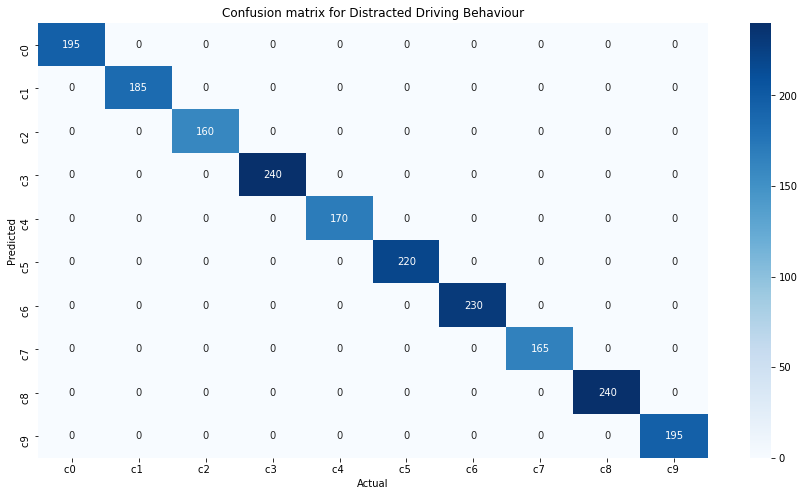

In [ ]:
conf_matrixx = sklearn.metrics.confusion_matrix(y_actu,y_pred)
plt.figure(figsize=(15,8))
sns.heatmap(conf_matrixx, 
            annot=True,
            xticklabels=['c0 ', 'c1 ', 'c2 ', 'c3 ', 'c4 ', 'c5 ', 'c6 ', 'c7 ', 'c8 ','c9 '], 
            yticklabels=['c0 ', 'c1 ', 'c2 ', 'c3 ', 'c4 ', 'c5 ', 'c6 ', 'c7 ', 'c8 ','c9 '],
            cmap="Blues",
           fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix for Distracted Driving Behaviour')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history_Adam.history['loss'], label='Training Loss')
plt.plot(history_Adam.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history_Adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_Adam.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

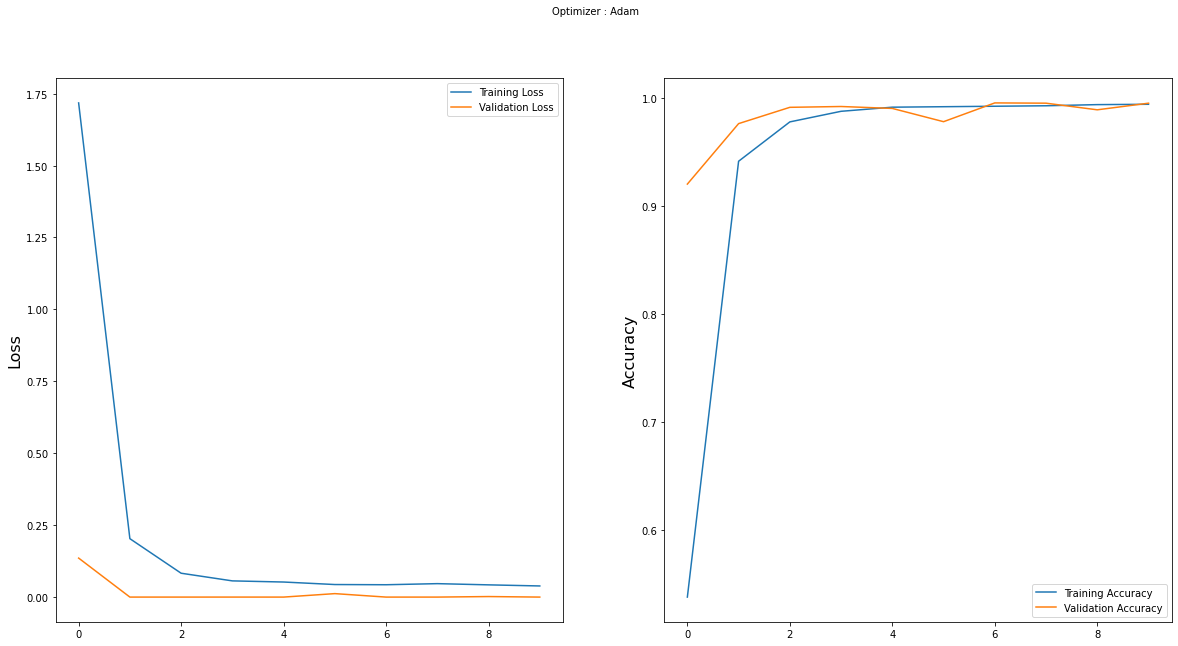

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history_RMS.history['loss'], label='Training Loss')
plt.plot(history_RMS.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history_RMS.history['accuracy'], label='Training Accuracy')
plt.plot(history_RMS.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()